In [679]:
%%html
<style>
body {
    font-family: "Times New Roman", Times, serif;
}
</style>    

NBA Data Analysis by Alperen Yildiz

In [680]:
import pandas as pd
import matplotlib.pyplot as plt

The data I am using is statistics for every NBA player for the 2019-2020 season. The data was taken from basketball-reference.com. To control for playing time, I used per 100 possessions stats which records a players statistics per possession and then multiplies by 100. 

In [681]:
NBA_df = pd.read_csv('2020nbastats.csv')

In [682]:
NBA_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1,Steven Adams\adamsst01,C,26,OKC,58,58,1564,8.2,13.8,...,16.9,4.4,1.6,2.0,2.7,3.5,19.7,NaN,123.0,106
1,2,Bam Adebayo\adebaba01,PF,22,MIA,65,65,2235,8.9,15.7,...,15.0,7.3,1.7,1.9,4.0,3.6,23.1,NaN,117.0,106
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,10.7,21.7,...,10.7,3.5,1.0,2.4,2.0,3.5,27.4,NaN,115.0,113
3,4,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,0,501,7.1,20.9,...,7.4,6.8,1.0,0.6,3.7,4.2,19.5,NaN,91.0,113
4,5,Grayson Allen\allengr01,SG,24,MEM,30,0,498,7.4,16.5,...,6.2,4.0,0.6,0.1,2.2,3.4,20.7,NaN,111.0,115


I want to clean up the Player column

In [683]:
def name_only(name):
    return name.split("\\")[0]
#expected output: 'Grayson Allen'
name_only(NBA_df['Player'][4])

'Grayson Allen'

Nice.

In [684]:
NBA_df['Player'] = NBA_df['Player'].apply(lambda player: name_only(player))

In [685]:
NBA_df['Player']

0                  Steven Adams
1                   Bam Adebayo
2             LaMarcus Aldridge
3      Nickeil Alexander-Walker
4                 Grayson Allen
                 ...           
619              Thaddeus Young
620                  Trae Young
621                 Cody Zeller
622                  Ante Žižić
623                 Ivica Zubac
Name: Player, Length: 624, dtype: object

The Unnamed:29 column isn't supposed to be there and it looks like all of the rows of that column are NaN values so I'm going to just drop it.

In [686]:
NBA_df = NBA_df.dropna(axis='columns',how='all' )

Since we're going by per 100 possessions stats, a player with less minutes could skew the data. For example, if a player played two possessions all season and scored 2 points, his per 100 possession points per game would be 50 points per game. To control for this, I'm only going to consider players who have played more than 48 * 2 minutes for the season (two full games total).

In [687]:
NBA_df = NBA_df[NBA_df['MP'] >= 96]

In [779]:
NBA_df

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

We don't need the 'Rk' column at all.

In [689]:
NBA_df = NBA_df.drop('Rk', axis=1)

In [690]:
NBA_df = NBA_df.reset_index()

In [691]:
NBA_df = NBA_df.drop('index', axis=1)

In [796]:
NBA_df

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

I want to see if there exists a statistically significant difference in scoring between point guards and shooting guards. On paper, point guards are supposed to facilitate an offense meaning they pass the ball more than they score it, while shooting guards are meant to score the ball. 

Null Hypothesis H_O: u_1 = u_2 - 
Our null hypothesis is that the means of points per 100 possession are not statistically significantly different.

Alternate Hypothesis: H_A: u_1 != u_2 - 
Our alternate hypothesis is that the means are different in a statistically significant manner.

First we need to filter out the DataFrame so that we have only PG's and SG's and then only their Points per 100 Poss.

In [693]:
PG_and_SG_df = NBA_df[(NBA_df['Pos'] == 'PG') | (NBA_df['Pos'] == 'SG')]

In [694]:
PG_and_SG_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
3,Nickeil Alexander-Walker,SG,21,NOP,41,0,501,7.1,20.9,0.339,...,6.6,7.4,6.8,1.0,0.6,3.7,4.2,19.5,91.0,113
4,Grayson Allen,SG,24,MEM,30,0,498,7.4,16.5,0.449,...,5.7,6.2,4.0,0.6,0.1,2.2,3.4,20.7,111.0,115
6,Kadeem Allen,SG,27,NYK,10,0,117,7.9,18.3,0.432,...,2.9,3.7,8.7,2.1,0.8,3.3,2.9,20.8,106.0,114
12,Ryan Arcidiacono,PG,25,CHI,58,4,930,4.7,11.4,0.409,...,4.7,5.7,5.0,1.4,0.2,1.9,5.0,13.5,111.0,113
16,D.J. Augustin,PG,32,ORL,49,6,1215,6.3,15.9,0.393,...,3.7,4.4,9.0,1.2,0.0,2.8,2.1,20.5,114.0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Derrick White,SG,25,SAS,61,13,1468,7.0,15.2,0.459,...,5.3,6.3,6.7,1.3,1.8,2.5,4.4,20.7,117.0,114
498,Andrew Wiggins,SG,24,GSW,12,12,403,10.2,22.3,0.457,...,4.4,6.5,5.1,1.9,2.0,3.0,3.1,27.7,106.0,113
502,Lou Williams,SG,33,LAC,60,8,1757,9.8,23.7,0.416,...,4.2,5.0,9.2,1.1,0.3,4.6,2.1,30.0,109.0,111
511,Delon Wright,SG,27,DAL,65,5,1412,6.1,13.1,0.470,...,6.6,8.9,7.5,2.6,0.7,2.3,2.8,16.3,121.0,109


In [695]:
players = PG_and_SG_df['Player']
points = PG_and_SG_df['PTS']
pos = PG_and_SG_df['Pos']
pg_sg_points_df = pd.DataFrame({'Player': players, 'PTS': points, 'Pos': pos})

In [696]:
pg_sg_points_df

,Player,PTS,Pos
3,Nickeil Alexander-Walker,19.5,SG
4,Grayson Allen,20.7,SG
6,Kadeem Allen,20.8,SG
12,Ryan Arcidiacono,13.5,PG
16,D.J. Augustin,20.5,PG
...,...,...,...
494,Derrick White,20.7,SG
498,Andrew Wiggins,27.7,SG
502,Lou Williams,30.0,SG
511,Delon Wright,16.3,SG


Now we're going to split this up into two separate dataframes, one for point guards and one for shooting guards.

In [697]:
pgs_df = pg_sg_points_df[pg_sg_points_df['Pos'] == 'PG']
sgs_df = pg_sg_points_df[pg_sg_points_df['Pos'] == 'SG']

In [698]:
pgs_df

,Player,PTS,Pos
12,Ryan Arcidiacono,13.5,PG
16,D.J. Augustin,20.5,PG
20,Lonzo Ball,17.7,PG
22,J.J. Barea,24.0,PG
45,Patrick Beverley,13.8,PG
...,...,...,...
486,Derrick Walton,10.1,PG
487,Derrick Walton,10.6,PG
488,Brad Wanamaker,16.4,PG
492,Russell Westbrook,35.5,PG


In [699]:
sgs_df

,Player,PTS,Pos
3,Nickeil Alexander-Walker,19.5,SG
4,Grayson Allen,20.7,SG
6,Kadeem Allen,20.8,SG
18,Dwayne Bacon,16.3,SG
24,RJ Barrett,22.9,SG
...,...,...,...
493,Coby White,24.7,SG
494,Derrick White,20.7,SG
498,Andrew Wiggins,27.7,SG
502,Lou Williams,30.0,SG


I want to find a statistical distribution that fits this data well so I can continue my hypothesis testing. First I will plot the data in a histogram to get a feel for the histogram.

Text(0, 0.5, 'Frequency')

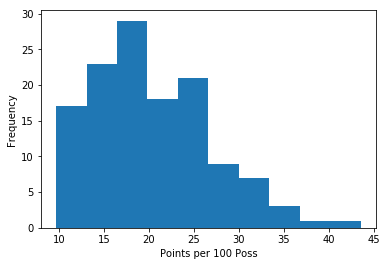

In [700]:
plt.hist(sgs_df['PTS'])
plt.xlabel('Points per 100 Poss')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

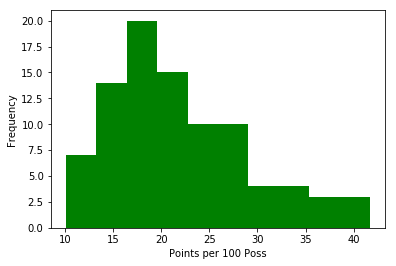

In [701]:
plt.hist(pgs_df['PTS'], color='green')
plt.xlabel('Points per 100 Poss')
plt.ylabel('Frequency')

I found this code at http://www.insightsbot.com/fitting-probability-distributions-with-python/ and it should help me find a good fit for the distribution that our data follows.

In [702]:
import scipy
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
class Distribution:
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['norm','lognorm','expon']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')
            
    def Plot(self,y):
        x = self.Random(n=len(y))
        plt.hist(x, alpha=0.5, label='Fitted')
        plt.hist(y, alpha=0.5, label='Actual')
        plt.legend(loc='upper right')

('lognorm', 0.8027275185907423)


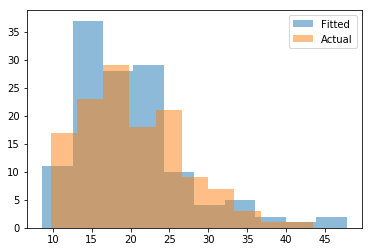

In [703]:
dst = Distribution()
sg_pts = sgs_df['PTS']
print(dst.Fit(sg_pts))
dst.Plot(sg_pts)

('lognorm', 0.9947423503521815)


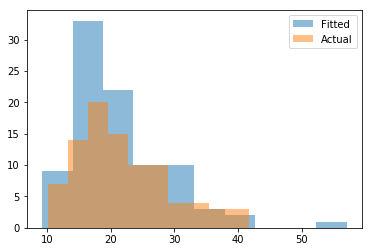

In [704]:
dst_2 = Distribution()
pg_pts = pgs_df['PTS']
print(dst_2.Fit(pg_pts))
dst_2.Plot(pg_pts)

Our data follows a lognormal distribution. This means that for a random variable X in our data, a variable Y = ln(X) is normally distributed. To make my life easier, I'm going to change the PTS column in the PGs and SGs dataframes so that the data follows a normal distribution.

In [705]:
import numpy as np
def ln(x):
    return np.log(x)

In [706]:
#test (should be 1 or extremely close since we're inputting an approximation of e)
ln(2.71828)

0.999999327347282

In [707]:
pgs_df.iloc[:, 1] = pgs_df.iloc[:, 1].apply(lambda x: ln(x))
sgs_df.iloc[:, 1] = sgs_df.iloc[:, 1].apply(lambda x: ln(x))

In [708]:
pgs_df

,Player,PTS,Pos
12,Ryan Arcidiacono,2.602690,PG
16,D.J. Augustin,3.020425,PG
20,Lonzo Ball,2.873565,PG
22,J.J. Barea,3.178054,PG
45,Patrick Beverley,2.624669,PG
...,...,...,...
486,Derrick Walton,2.312535,PG
487,Derrick Walton,2.360854,PG
488,Brad Wanamaker,2.797281,PG
492,Russell Westbrook,3.569533,PG


In [709]:
sgs_df

,Player,PTS,Pos
3,Nickeil Alexander-Walker,2.970414,SG
4,Grayson Allen,3.030134,SG
6,Kadeem Allen,3.034953,SG
18,Dwayne Bacon,2.791165,SG
24,RJ Barrett,3.131137,SG
...,...,...,...
493,Coby White,3.206803,SG
494,Derrick White,3.030134,SG
498,Andrew Wiggins,3.321432,SG
502,Lou Williams,3.401197,SG


(array([ 5., 12., 10., 22., 23., 18., 23., 11.,  3.,  2.]),
 array([2.27212589, 2.42218939, 2.5722529 , 2.7223164 , 2.87237991,
        3.02244341, 3.17250692, 3.32257042, 3.47263393, 3.62269743,
        3.77276094]),
 <a list of 10 Patch objects>)

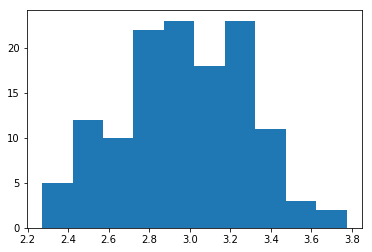

In [710]:
plt.hist(sgs_df['PTS'])

This seems to roughly follow a normal distribution. We can continue our analysis, and will assign a significance level of .05. We first compute our test statistic with the test statistic formula for a normal distribution and the difference of two means. The formula is (x_hat1 - x_hat2) / sqrt(variance1/sample_size1 + variance2/sample_size2)

In [711]:
import math
def test_stat(pos, pos2, stat):
    pos_sample_mean = pos[stat].mean()
    pos_sample_var = pos[stat].var()
    pos_sample_size = len(pos[stat])
    pos2_sample_mean = pos2[stat].mean()
    pos2_sample_var = pos2[stat].var()
    pos2_sample_size = len(pos2[stat])
    numerator = pos_sample_mean - pos2_sample_mean
    first_frac = pos_sample_var/pos_sample_size
    second_frac = pos2_sample_var/pos2_sample_size
    denominator = math.sqrt(first_frac + second_frac)
    return numerator / denominator

In [712]:
test_stat(pgs_df, sgs_df, 'PTS')

1.3992626075923527

This is a two tailed test so we look at Z_(significance score / 2) which is Z_.025 = 1.96 The rejection region of this two tailed test is |test_stat| > 1.96. This means that if the absolute value of our test statistic is greather than 1.96, we reject the null hypothesis. Our test_stat is 1.399 which is not greater than 1.96, so we fail to reject the null hypothesis and it seems that there is no statistically significant difference in the scoring abilities of point guards and shooting guards.


The next thing I want to see is if there is a statistically significant difference in rebounding per 100 possession between a point guard and a center. I would be surprised if there wasn't considering centers tend to be around 6-12 inches taller than point guards. Our null hypothesis H_O is that there is no statistically significant difference and our alternate hypothesis H_a is that there is a statistically significant difference in the rebounding numbers of point guards and centers. First we want to truncate our dataframe so it only consists of point guards and centers.

In [713]:
PG_and_C_df = NBA_df[(NBA_df['Pos'] == 'PG') | (NBA_df['Pos'] == 'C')]

In [714]:
players = PG_and_C_df['Player']
rebounds = PG_and_C_df['TRB']
pos = PG_and_C_df['Pos']
pg_c_rebs_df = pd.DataFrame({'Player': players, 'TRB': rebounds, 'Pos': pos})

In [715]:
pg_c_rebs_df

,Player,TRB,Pos
0,Steven Adams,16.9,C
2,LaMarcus Aldridge,10.7,C
5,Jarrett Allen,17.4,C
12,Ryan Arcidiacono,5.7,PG
16,D.J. Augustin,4.4,PG
...,...,...,...
506,Robert Williams,16.2,C
513,Trae Young,5.6,PG
514,Cody Zeller,15.4,C
515,Ante Žižić,14.5,C


In [716]:
pg_rebs = pg_c_rebs_df[pg_c_rebs_df['Pos'] == 'PG']
c_rebs = pg_c_rebs_df[pg_c_rebs_df['Pos'] == 'C']

Text(0.5, 0, 'Number of rebounds')

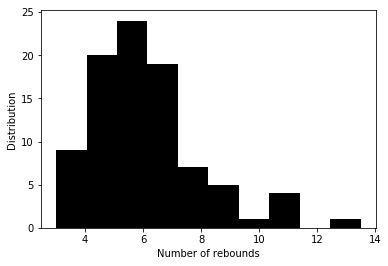

In [717]:
plt.hist(pg_rebs['TRB'], color='black')
plt.ylabel('Distribution')
plt.xlabel('Number of rebounds')

Text(0.5, 0, 'Number of Total Rebounds')

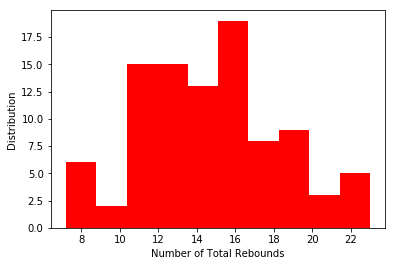

In [718]:
plt.hist(c_rebs['TRB'], color='red')
plt.ylabel('Distribution')
plt.xlabel('Number of Total Rebounds')

I'm going to run the distribution tests on this data and see what happens. 

('lognorm', 0.9655885273750161)


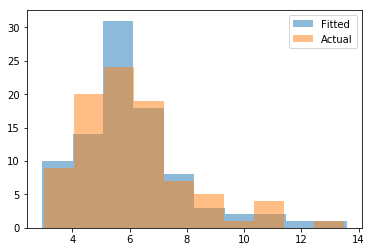

In [719]:
pg_dst = Distribution()
pg_trb = pg_rebs['TRB']
print(pg_dst.Fit(pg_trb))
pg_dst.Plot(pg_trb)

('lognorm', 0.9926040721836422)


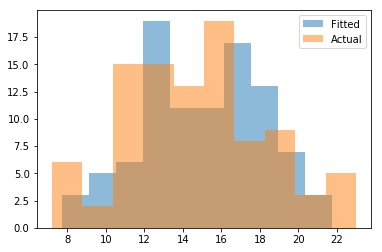

In [720]:
c_rebounds = Distribution()
c_trb = c_rebs['TRB']
print(c_rebounds.Fit(c_trb))
c_rebounds.Plot(c_trb)

In [721]:
pg_rebs.iloc[:, 1] = pg_rebs.iloc[:, 1].apply(lambda x: ln(x))
c_rebs.iloc[:, 1] = c_rebs.iloc[:, 1].apply(lambda x: ln(x))

(array([ 5.,  4., 12., 14., 25., 12.,  8.,  5.,  4.,  1.]),
 array([1.09861229, 1.24902003, 1.39942777, 1.54983551, 1.70024325,
        1.85065099, 2.00105873, 2.15146647, 2.30187421, 2.45228195,
        2.60268969]),
 <a list of 10 Patch objects>)

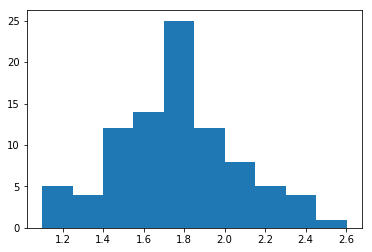

In [722]:
plt.hist(pg_rebs['TRB'])

(array([ 4.,  2.,  2., 12., 10., 15., 20., 13., 10.,  7.]),
 array([1.97408103, 2.09022235, 2.20636366, 2.32250498, 2.4386463 ,
        2.55478762, 2.67092894, 2.78707026, 2.90321158, 3.0193529 ,
        3.13549422]),
 <a list of 10 Patch objects>)

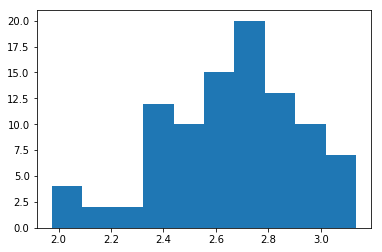

In [723]:
plt.hist(c_rebs['TRB'])

It seems that the distributions are roughly normal now. 

In [724]:
test_stat(pg_rebs, c_rebs, 'TRB')

-21.908083421730904

Since we're only looking at if the means differ, this is a two tailed test. That means that if the absolute value of our test statistic is greater than the absolute value of Z at our alpha level, we reject the null hypothesis. As we can see the absolute value of our test stat is much greater than 1.96, so we reject the null hypothesis. This makes sense because one of the main roles of a center is to get rebounds while a point guard isn't too concerned with rebounding the basketball.

In [725]:
pg_rebs['TRB'].describe()

count    90.000000
mean      1.760162
std       0.292398
min       1.098612
25%       1.568616
50%       1.740466
75%       1.942313
max       2.602690
Name: TRB, dtype: float64

In [726]:
c_rebs['TRB'].describe()

count    95.000000
mean      2.654422
std       0.260844
min       1.974081
25%       2.484907
50%       2.694627
75%       2.824346
max       3.135494
Name: TRB, dtype: float64

Looking at the simple statistics of the data, the minimum of the centers total rebounds is higher than the 75th percentile for the point guards. That's even more evidence that our test checks out and that the difference should be statistically significant. 


In [727]:
NBA_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,Steven Adams,C,26,OKC,58,58,1564,8.2,13.8,0.591,...,10.8,16.9,4.4,1.6,2.0,2.7,3.5,19.7,123.0,106
1,Bam Adebayo,PF,22,MIA,65,65,2235,8.9,15.7,0.567,...,11.3,15.0,7.3,1.7,1.9,4.0,3.6,23.1,117.0,106
2,LaMarcus Aldridge,C,34,SAS,53,53,1754,10.7,21.7,0.493,...,7.9,10.7,3.5,1.0,2.4,2.0,3.5,27.4,115.0,113
3,Nickeil Alexander-Walker,SG,21,NOP,41,0,501,7.1,20.9,0.339,...,6.6,7.4,6.8,1.0,0.6,3.7,4.2,19.5,91.0,113
4,Grayson Allen,SG,24,MEM,30,0,498,7.4,16.5,0.449,...,5.7,6.2,4.0,0.6,0.1,2.2,3.4,20.7,111.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Thaddeus Young,PF,31,CHI,64,16,1591,8.1,18.2,0.448,...,6.7,9.5,3.5,2.8,0.7,3.1,4.1,20.0,101.0,108
513,Trae Young,PG,21,ATL,60,60,2120,12.0,27.5,0.437,...,4.9,5.6,12.3,1.4,0.2,6.4,2.3,39.1,114.0,117
514,Cody Zeller,C,27,CHO,58,39,1341,9.4,17.9,0.524,...,9.4,15.4,3.3,1.5,0.9,2.8,5.2,24.0,116.0,111
515,Ante Žižić,C,23,CLE,22,0,221,9.0,15.9,0.569,...,10.6,14.5,1.3,1.5,1.1,2.2,5.9,21.1,116.0,113


For this next part I want to use machine learning techniques to see if I can predict a player's position based on any statistic that I think could be different based off the position of the player. 

In [728]:
import numpy as np

In [729]:
#normally I would start at 0 but in basketball the positions are sometimes referred to as "the 1" for the point guard, 2 for shooting guard, and so on
def pos_to_int(pos):
    if pos == 'PG':
        return 1
    elif pos == 'SG':
        return 2
    elif pos == 'SF':
        return 3
    elif pos == 'PF':
        return 4
    else:
        return 5

In [730]:
NBA_df['Pos'] = NBA_df['Pos'].apply(lambda x: pos_to_int(x))

In [818]:
ml_df = NBA_df[['Pos', 'AST', 'TRB', 'FG%', 'STL', 'BLK', 'FTA', 'ORB', 'FGA', 'FT%', 'DRB', '3PA', 'ORtg', 'DRtg']]
ml_df = ml_df.dropna(axis=0, how='any')

In [819]:
ml_df

,Pos,AST,TRB,FG%,STL,BLK,FTA,ORB,FGA,FT%,DRB,3PA,ORtg,DRtg
0,5,4.4,16.9,0.591,1.6,2.0,5.7,6.1,13.8,0.590,10.8,0.1,123.0,106
1,4,7.3,15.0,0.567,1.7,1.9,7.5,3.6,15.7,0.690,11.3,0.3,117.0,106
2,5,3.5,10.7,0.493,1.0,2.4,5.2,2.8,21.7,0.827,7.9,4.3,115.0,113
3,2,6.8,7.4,0.339,1.0,0.6,2.6,0.7,20.9,0.607,6.6,10.8,91.0,113
4,2,4.0,6.2,0.449,0.6,0.1,3.3,0.5,16.5,0.857,5.7,8.5,111.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3.5,9.5,0.448,2.8,0.7,2.2,2.8,18.2,0.583,6.7,6.7,101.0,108
513,1,12.3,5.6,0.437,1.4,0.2,12.3,0.7,27.5,0.860,4.9,12.5,114.0,117
514,5,3.3,15.4,0.524,1.5,0.9,6.7,6.0,17.9,0.682,9.4,2.8,116.0,111
515,5,1.3,14.5,0.569,1.5,1.1,4.2,4.0,15.9,0.737,10.6,0.0,116.0,113


In [820]:
ml_df = ml_df.values

In [821]:
X = ml_df[:, 1:]
Y = ml_df[:, 0]

In [822]:
from sklearn.model_selection import train_test_split

In [823]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [824]:
Y_test

array([3., 2., 4., 5., 2., 5., 1., 3., 1., 1., 4., 2., 2., 4., 5., 3., 2.,
       2., 2., 4., 1., 5., 4., 4., 1., 1., 1., 5., 2., 4., 2., 2., 4., 1.,
       5., 5., 1., 4., 4., 3., 5., 2., 2., 3., 2., 4., 5., 4., 2., 5., 5.,
       1., 1., 5., 2., 2., 1., 4., 3., 1., 5., 5., 3., 3., 2., 3., 5., 3.,
       1., 3., 4., 4., 1., 2., 1., 1., 1., 4., 4., 4., 3., 4., 2., 3., 4.,
       4., 1., 2., 4., 1., 5., 5., 5., 4., 2., 2., 2., 5., 3., 4., 3., 4.,
       2., 5., 3., 2., 3., 4., 3., 4., 1., 5., 3., 5., 3., 2., 1., 1., 3.,
       1., 4., 3., 5., 2., 2., 4., 1., 1., 3.])

For our algorithm we'll explore the results of both logistic regression and K-Neighbors.

In [825]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [826]:
KN_model = KNeighborsClassifier().fit(X_train, Y_train)

In [827]:
y_pred = KN_model.predict(X_test)

In [828]:
y_pred

array([3., 2., 4., 5., 3., 4., 1., 3., 1., 1., 4., 2., 3., 5., 5., 4., 2.,
       1., 2., 4., 1., 4., 3., 3., 1., 2., 1., 3., 3., 2., 2., 1., 3., 2.,
       3., 5., 2., 2., 4., 2., 5., 2., 2., 3., 1., 2., 5., 5., 5., 2., 5.,
       1., 2., 5., 2., 2., 2., 5., 4., 1., 3., 4., 4., 4., 2., 3., 5., 3.,
       1., 1., 5., 4., 1., 3., 2., 2., 1., 5., 2., 4., 3., 2., 2., 3., 2.,
       3., 1., 1., 4., 1., 5., 5., 5., 4., 2., 3., 2., 5., 4., 3., 2., 3.,
       1., 5., 3., 2., 2., 4., 4., 5., 1., 2., 2., 3., 4., 1., 1., 1., 2.,
       1., 5., 3., 5., 2., 1., 3., 1., 1., 2.])

In [829]:
accuracy_score(y_pred, Y_test)

0.5116279069767442

In [830]:
LR_model = LogisticRegression().fit(X_train, Y_train)

C:\Users\alper\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [831]:
y_pred = LR_model.predict(X_test)

In [832]:
y_pred

array([3., 2., 4., 5., 1., 5., 1., 2., 1., 2., 4., 2., 2., 5., 5., 4., 2.,
       2., 2., 4., 1., 5., 4., 3., 2., 1., 1., 3., 2., 3., 2., 1., 4., 2.,
       2., 5., 1., 2., 4., 3., 5., 2., 2., 3., 2., 4., 5., 5., 5., 4., 5.,
       1., 1., 5., 3., 2., 1., 5., 3., 1., 4., 4., 3., 3., 2., 4., 5., 3.,
       1., 3., 5., 5., 1., 2., 1., 2., 1., 5., 4., 4., 3., 2., 2., 4., 4.,
       4., 1., 2., 4., 1., 5., 5., 5., 3., 2., 2., 2., 4., 4., 3., 2., 3.,
       1., 5., 4., 2., 3., 4., 4., 4., 1., 4., 4., 5., 2., 2., 1., 1., 4.,
       1., 5., 3., 5., 2., 1., 4., 1., 1., 2.])

In [833]:
accuracy_score(y_pred, Y_test)

0.6666666666666666

So neither one of these methods really worked too well. Perhaps it was too ambitious to assume that we could predict positions based off just a few simple stats, especially in a game where positions are not very meaningful anymore.